In [3]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the data to the scaler
scaler.fit(market_data_df)

# Transform the data
scaled_data = scaler.transform(market_data_df)

scaled_data[:5]





array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [7]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)



# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
scaled_df.head(10)




,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))



# Create an empty list to store the inertia values
inertia = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    inertia.append(km.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}   



# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)



# Display the DataFrame
elbow_df.head(10)



,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

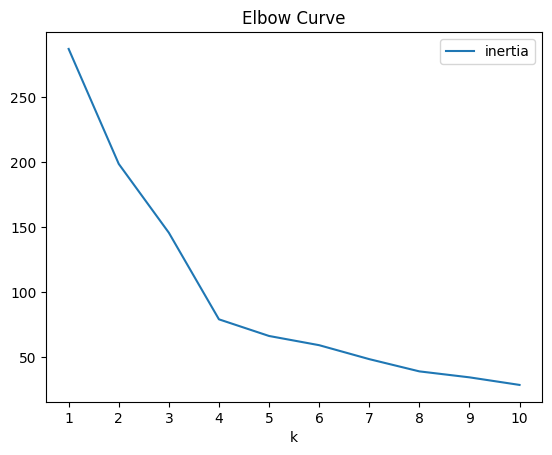

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
# Use the best value of k found in the Elbow curve
model = KMeans(n_clusters=4, random_state=0)




In [14]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)



KMeans(n_clusters=4, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# Use the data from the scaled DataFrame
clusters = model.predict(scaled_df)




# View the resulting array of cluster values.
clusters[:10]




array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0], dtype=int32)

In [16]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()



In [17]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["predicted clusters"] = model.labels_


# Display sample data
clustered_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029,0


<Axes: title={'center': 'Clustered Cryptocurrencies'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

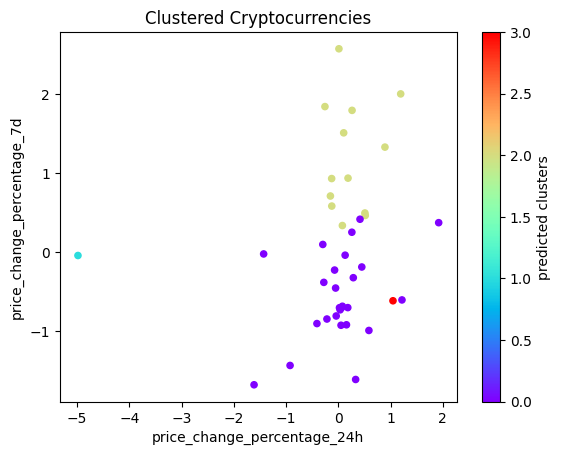

In [18]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted clusters", colormap="rainbow", title="Clustered Cryptocurrencies")



### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)



In [20]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
# Use the `fit_transform` function to reduce the dimensions of the scaled DataFrame
crypto_pca = pca.fit_transform(scaled_df)



# View the first five rows of the DataFrame. 
crypto_pca[:5]



array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [21]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

explained_variance



array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [22]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)



# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
pca_df.head(10)



,principal component 1,principal component 2,principal component 3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kvalues = list(range(1, 11))



# Create an empty list to store the inertia values
inertia = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in kvalues:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)


# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": kvalues, "inertia": inertia}



# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)


# Display the DataFrame
pca_elbow_df.head(10)


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

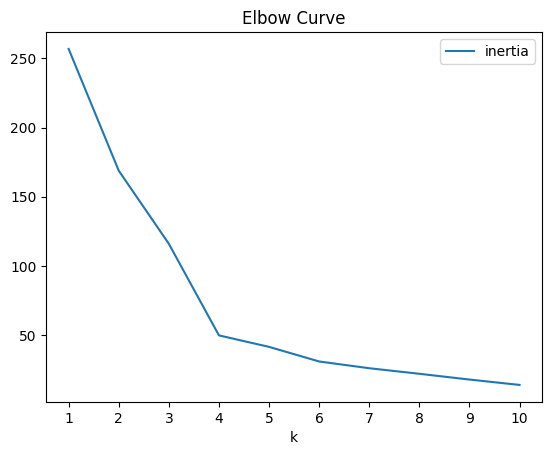

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=kvalues)



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
# Use the best value of k found in the Elbow curve
pca_model = KMeans(n_clusters=4, random_state=0)



In [26]:
# Fit the K-Means model using the PCA data
pca_model.fit(pca_df)



KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Use the data from the PCA DataFrame
pca_clusters = pca_model.predict(pca_df)


# Print the resulting array of cluster values.
pca_clusters[:10]


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0], dtype=int32)

In [28]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()



# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df["predicted clusters"] = pca_model.labels_



# Display sample data
pca_clustered_df.head(10)


,principal component 1,principal component 2,principal component 3,predicted clusters
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2
5,-0.516534,1.388377,0.804071,2
6,-0.450711,0.517699,2.846143,2
7,-0.345600,0.729439,1.478013,2
8,-0.649468,0.432165,0.600303,2
9,-0.759014,-0.201200,-0.217653,0


<Axes: title={'center': 'Clustered Cryptocurrencies Using PCA'}, xlabel='principal component 1', ylabel='principal component 2'>

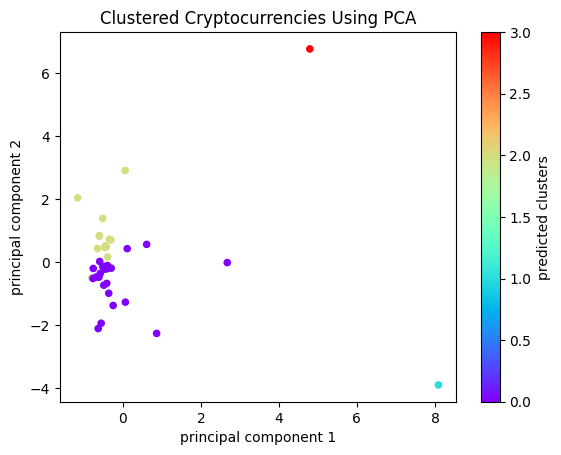

In [29]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "predicted clusters" for the color to better visualize the data.
pca_clustered_df.plot.scatter(x="principal component 1", y="principal component 2", c="predicted clusters", colormap="rainbow", title="Clustered Cryptocurrencies Using PCA")



### Determine the Weights of Each Feature on each Principal Component

In [34]:
pca_component_weight = pd.DataFrame(pca.components_, columns=scaled_df.columns, index=["principal component 1", "principal component 2", "principal component 3"])



#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    